# **Machine** **Learning-2** **Project**

Submitted by Sahith Kancharla

### Problem Statement: Easy Visa

The United States business community is experiencing an increasing demand for skilled human resources, both locally and internationally. To address workforce shortages, employers frequently hire foreign workers under the provisions of the Immigration and Nationality Act (INA), which requires employers to demonstrate that qualified U.S. workers are not available before foreign workers can be certified. The Office of Foreign Labor Certification (OFLC) processes these visa certification applications.
However, with over 775,000 applications processed in FY 2016 alone (a 9% increase from the previous year), the manual review and evaluation of each application has become time-consuming, resource-intensive, and error-prone.
To improve efficiency, there is a need for a data-driven Machine Learning (ML) solution that can predict whether a visa application is likely to be certified or denied, based on applicant and employer attributes. Such a solution would help:
Facilitate the visa approval process by reducing manual effort and speeding up decision-making.
Identify key factors influencing case outcomes, enabling better recommendations for applicants and employers.
Improve fairness and consistency in decision-making by relying on data-driven insights.
The dataset contains detailed features related to employees (education, job experience, training requirements) and employers (number of employees, year established, prevailing wage, work region, etc.), along with the final decision (case_status).
Therefore, the problem can be formulated as a binary classification task:
Input: Applicant and employer-related attributes.
Output: Predict whether a visa application will be Certified or Denied.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

In [2]:
import os
print(os.getcwd())

/Users/sahithkancharla


In [3]:
data = pd.read_csv("EasyVisa.csv")

In [4]:
print("Shape of Data",data.shape)

Shape of Data (25480, 12)


In [5]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [6]:
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [8]:
data.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [9]:
data.describe(include='all')

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
count,25480,25480,25480,25480,25480,25480.000000,25480.000000,25480,25480.000000,25480,25480,25480
unique,25480,6,4,2,2,NaN,NaN,5,NaN,4,2,2
top,EZYV01,Asia,Bachelor's,Y,N,NaN,NaN,Northeast,NaN,Year,Y,Certified
freq,1,16861,10234,14802,22525,NaN,NaN,7195,NaN,22962,22773,17018
mean,NaN,NaN,NaN,NaN,NaN,5667.043210,1979.409929,NaN,74455.814592,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,22877.928848,42.366929,NaN,52815.942327,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,-26.000000,1800.000000,NaN,2.136700,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1022.000000,1976.000000,NaN,34015.480000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,2109.000000,1997.000000,NaN,70308.210000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,3504.000000,2005.000000,NaN,107735.512500,NaN,NaN,NaN


In [10]:
print("Columns:", data.columns)

Columns: Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')


In [11]:
data.duplicated().sum()

0

In [12]:
print("Missing values:\n", data.isnull().sum())

Missing values:
 case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64


**Univariate Analysis**

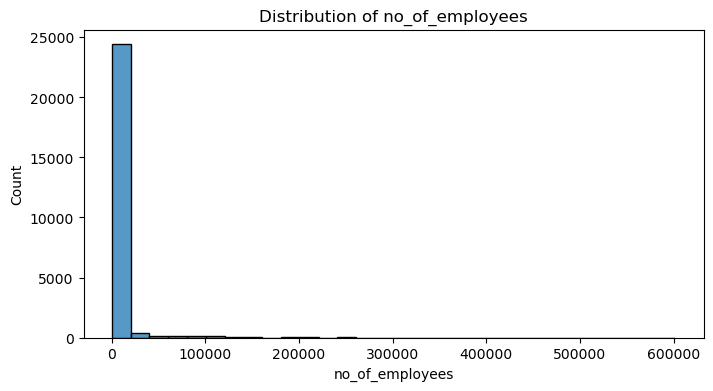

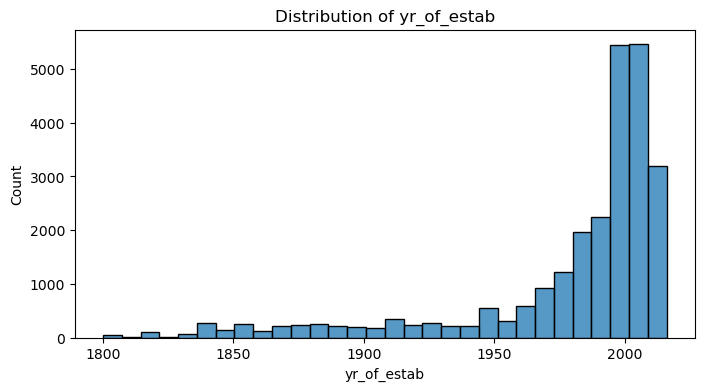

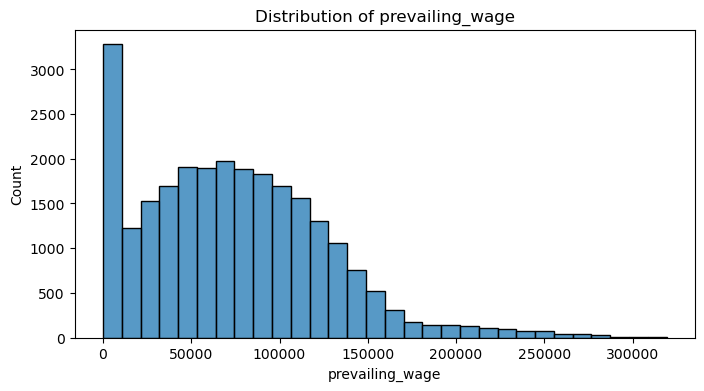

In [13]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(data[col], bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

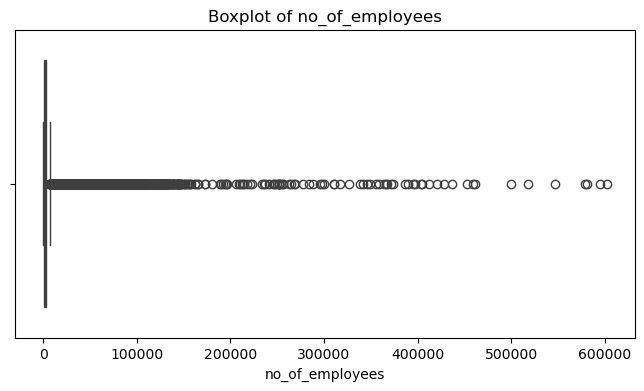

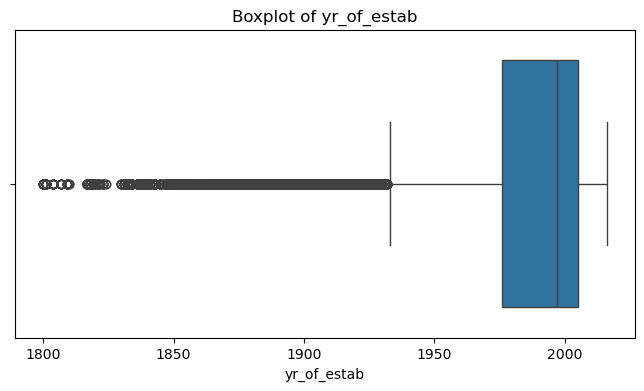

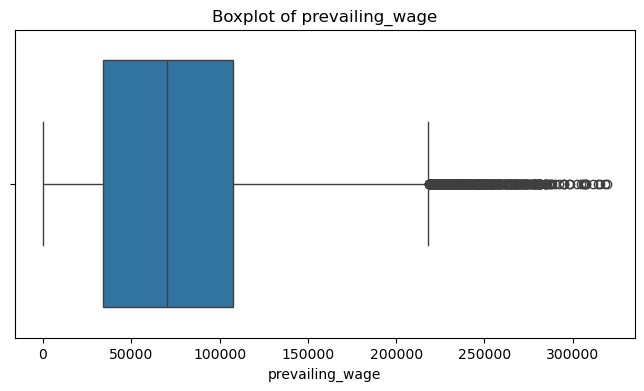

In [14]:
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

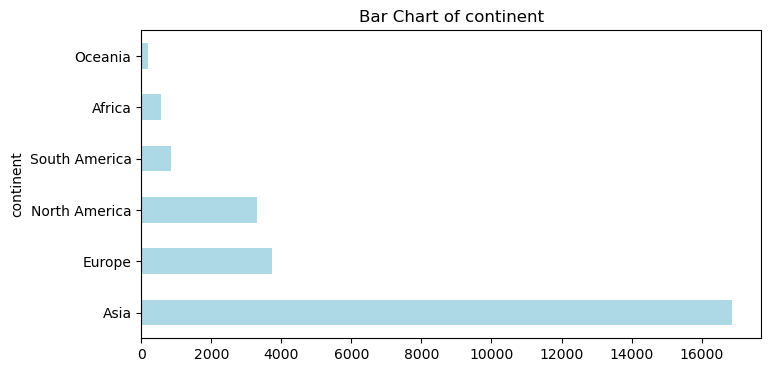

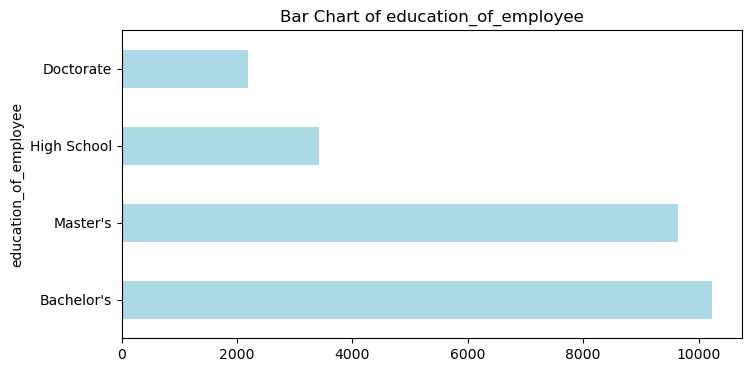

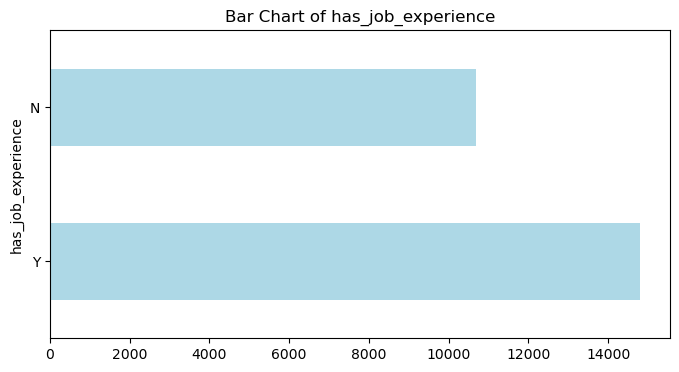

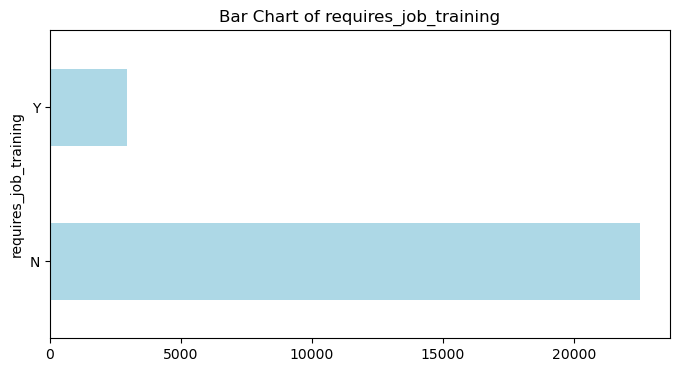

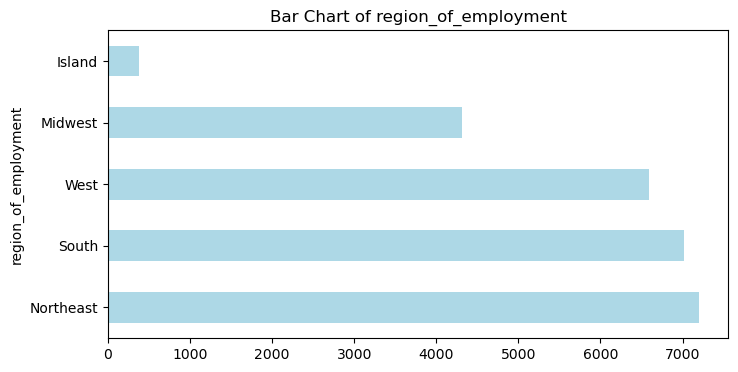

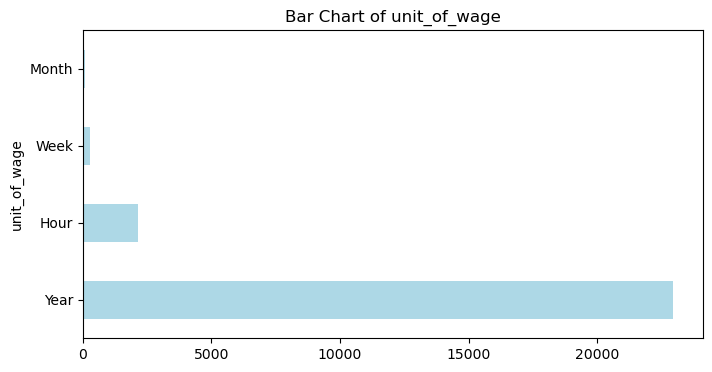

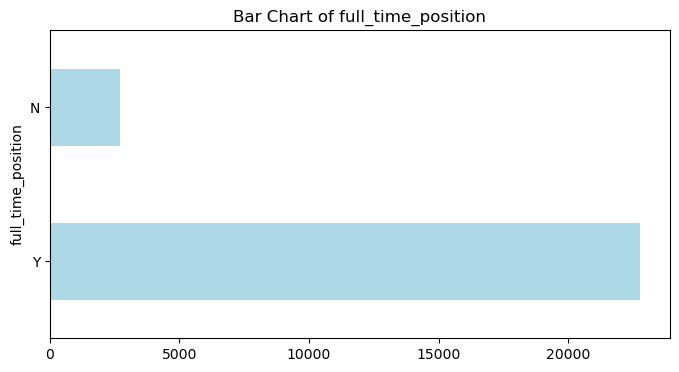

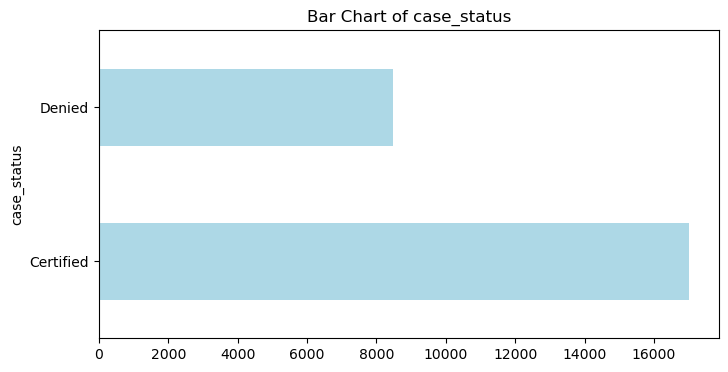

In [15]:
cat_cols = data.select_dtypes(include=['object']).columns
cat_cols = [col for col in cat_cols if col != 'case_id']
for col in cat_cols:
    plt.figure(figsize=(8,4))
    data[col].value_counts().plot(kind="barh", color="lightblue")
    plt.title(f"Bar Chart of {col}")
    plt.show()

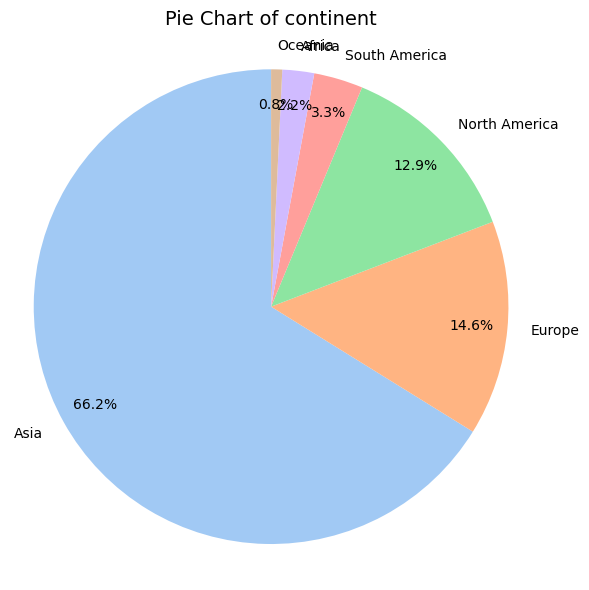

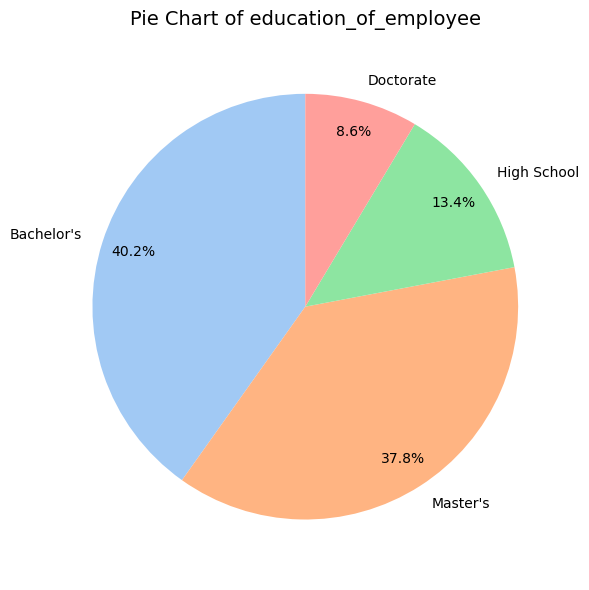

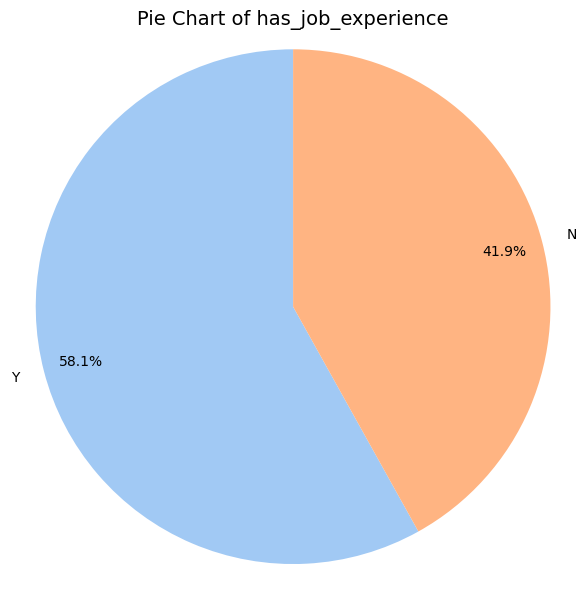

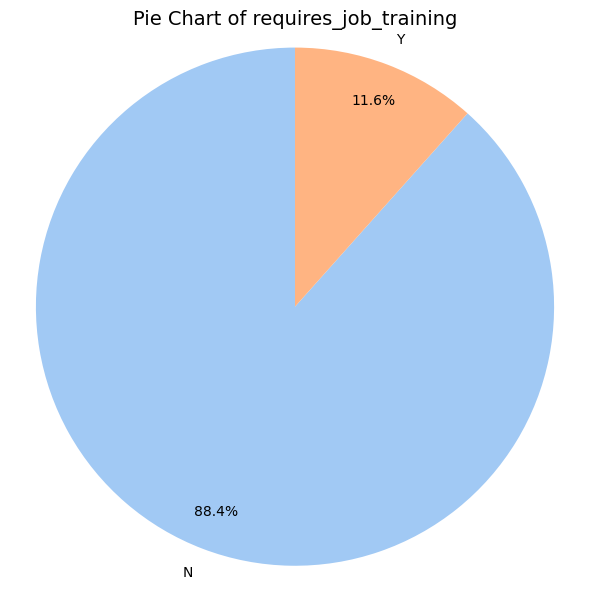

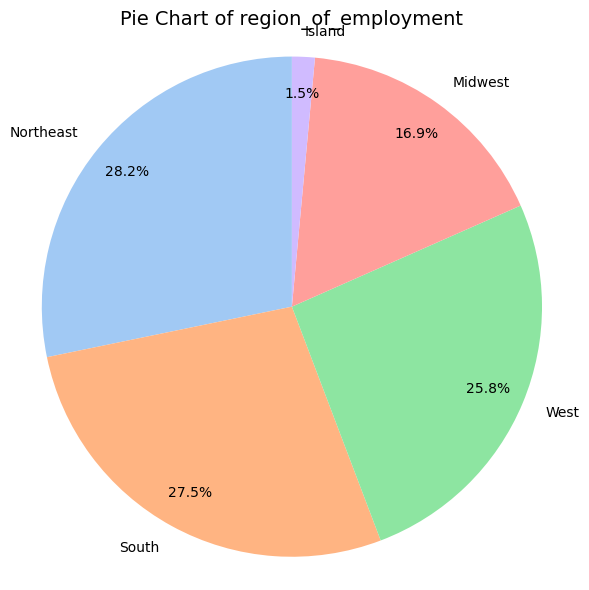

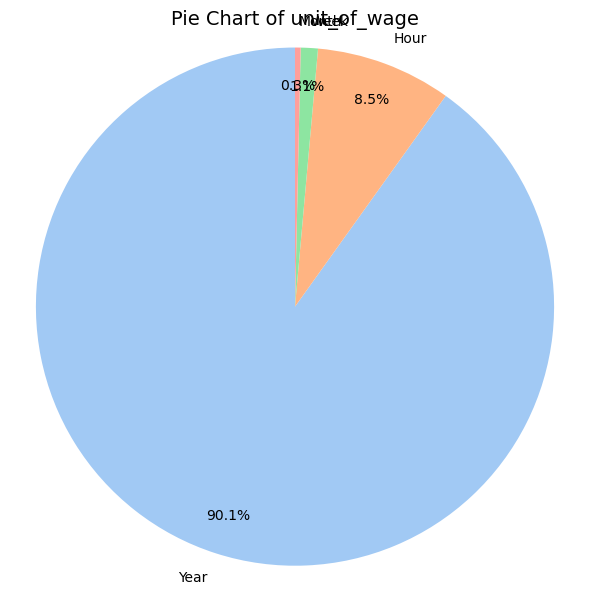

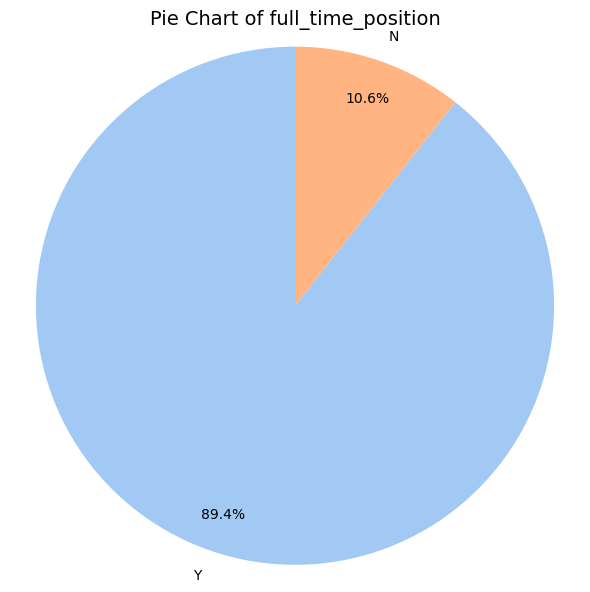

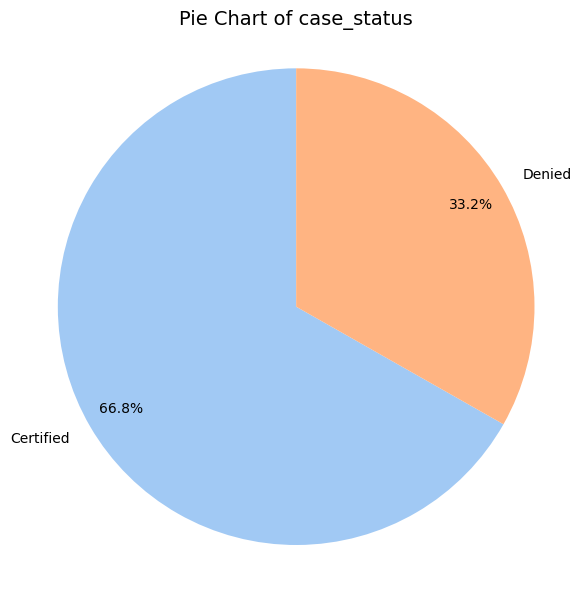

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in cat_cols:
    plt.figure(figsize=(6,6))
    values = data[col].value_counts()
    
    plt.pie(
        values,
        labels=values.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette("pastel"),
        pctdistance=0.85,   # moves % inside
        labeldistance=1.1   # pushes labels outside
    )
    
    plt.title(f"Pie Chart of {col}", fontsize=14)
    plt.axis('equal')  # keeps it circular
    plt.tight_layout()
    plt.show()

**Bivariate Analysis**

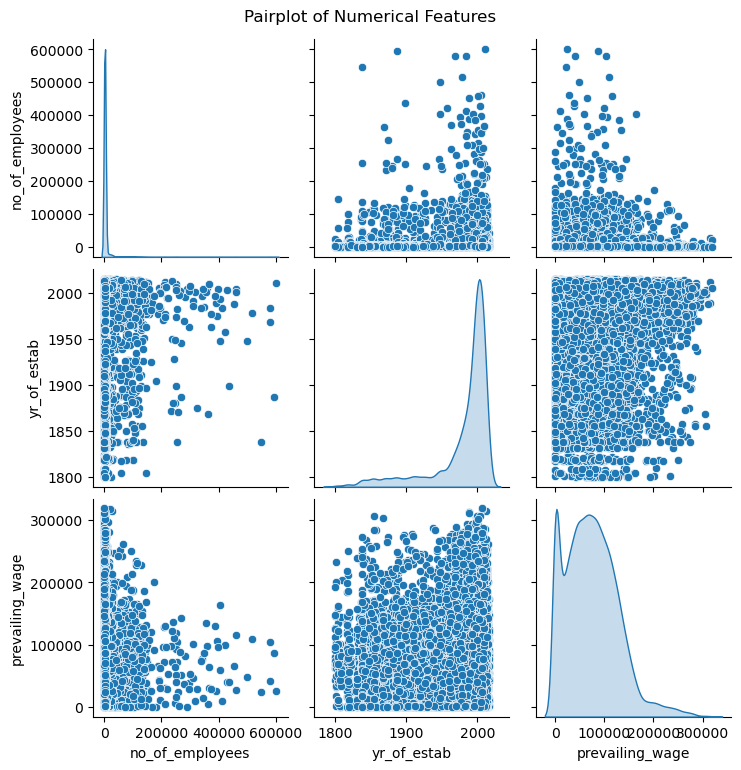

In [17]:

sns.pairplot(data[num_cols], diag_kind='kde')
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

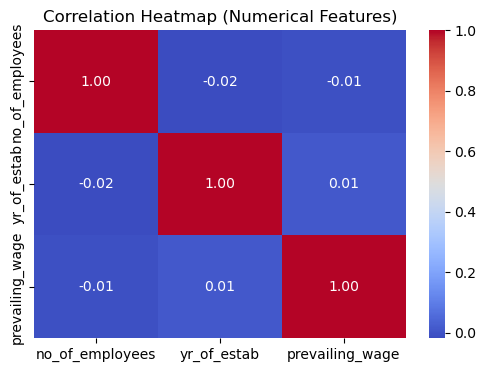

In [18]:
plt.figure(figsize=(6,4))
sns.heatmap(data[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

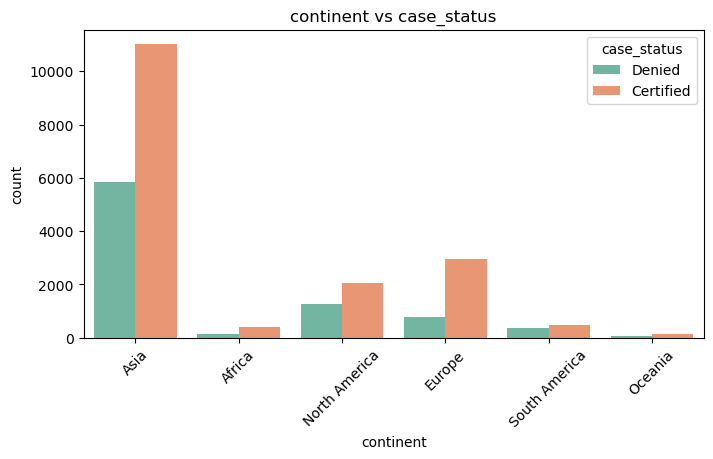

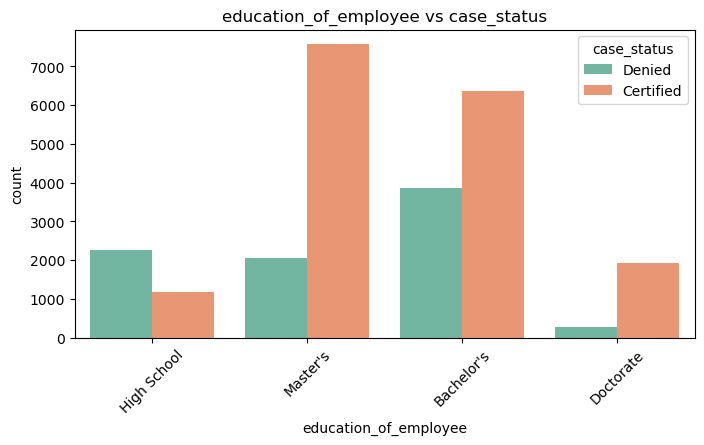

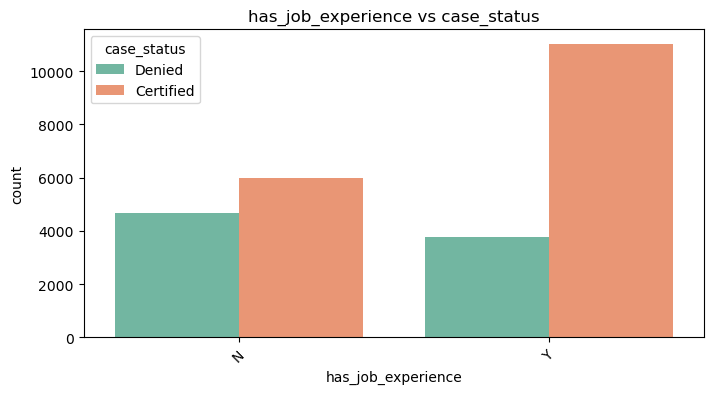

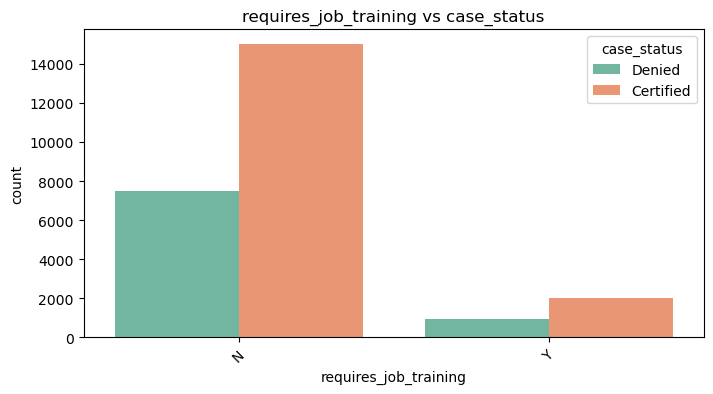

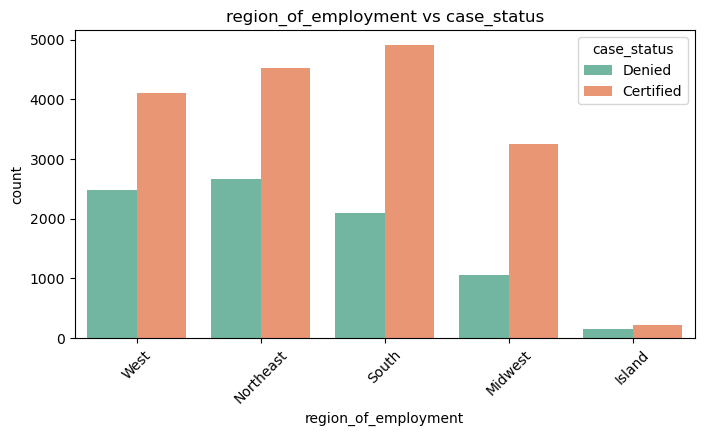

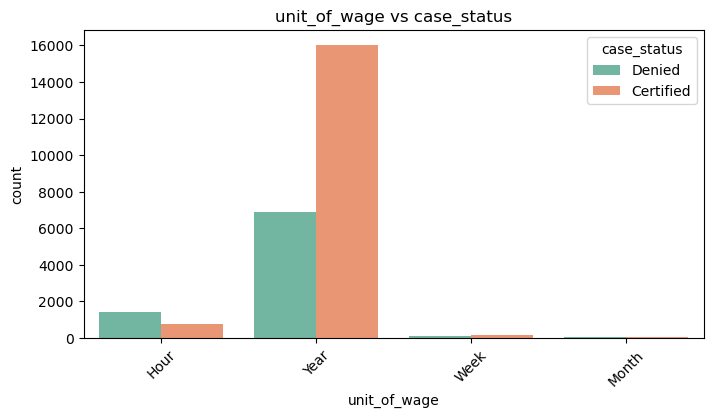

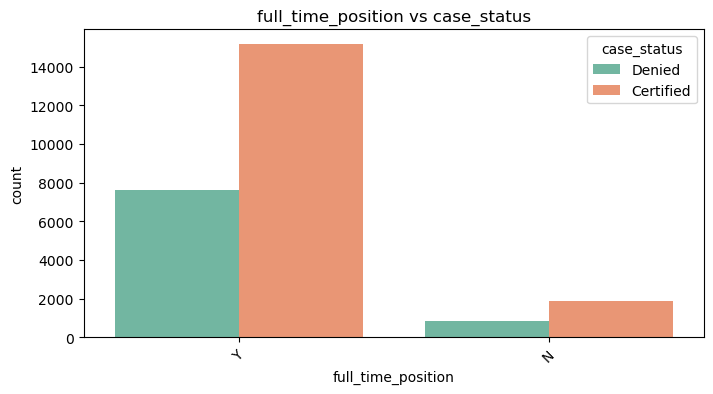

In [19]:
cat_cols = data.select_dtypes(include=['object']).columns
target='case_status'
cat_cols = [col for col in cat_cols if col not in ['case_id', target]]  # exclude ID & target

for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=data[col], hue=data[target], palette="Set2")
    plt.title(f"{col} vs {target}")
    plt.xticks(rotation=45)
    plt.show()

**Feature Engineering**

In [20]:
data= data.drop(columns=['case_id'])

# --------------------------
# 2. SPLIT DATA FIRST (to avoid leakage)
# --------------------------
X = data.drop(columns=['case_status'])
y = data['case_status']

# Train-test-validation split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# --------------------------
# 3. FEATURE ENGINEERING
# --------------------------

# Binary mappings
binary_map = {'Y': 1, 'N': 0}
for col in ['has_job_experience', 'requires_job_training', 'full_time_position']:
    X_train[col] = X_train[col].map(binary_map)
    X_valid[col] = X_valid[col].map(binary_map)
    X_test[col] = X_test[col].map(binary_map)

# Normalize wages to yearly
wage_multiplier = {'Hour': 2080, 'Week': 52, 'Month': 12, 'Year': 1}
for df_ in [X_train, X_valid, X_test]:
    df_['wage_per_year'] = df_.apply(
        lambda row: row['prevailing_wage'] * wage_multiplier.get(row['unit_of_wage'], 1), axis=1
    )
    df_['company_age'] = 2025 - df_['yr_of_estab']
    df_.drop(columns=['prevailing_wage', 'unit_of_wage', 'yr_of_estab'], inplace=True)

# --------------------------
# 4. DEFINE COLUMNS
# --------------------------
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# --------------------------
# 5. PREPROCESSING PIPELINE
# --------------------------

# Numerical pipeline: handle missing + outliers + scaling
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),   # Missing values
    ("scaler", StandardScaler())                     # Standardization
])

# Categorical pipeline: handle missing + one-hot encoding
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Full preprocessing pipeline
preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_cols),
    ("cat", cat_pipeline, cat_cols)
])

# --------------------------
# 6. FIT TRANSFORM ONLY ON TRAIN (no leakage)
# --------------------------
X_train_processed = preprocessor.fit_transform(X_train)
X_valid_processed = preprocessor.transform(X_valid)
X_test_processed = preprocessor.transform(X_test)

print("Train shape:", X_train_processed.shape)
print("Validation shape:", X_valid_processed.shape)
print("Test shape:", X_test_processed.shape)

Train shape: (17836, 21)
Validation shape: (3822, 21)
Test shape: (3822, 21)


# **Model Building**-**Original Data**

**Decision Tree**

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

# Model
dt = DecisionTreeClassifier(criterion="gini",     # split criterion: "gini" or "entropy"
    max_depth=10,         # controls tree depth (None = full growth)
    min_samples_split=10, # minimum samples required to split
    min_samples_leaf=5, random_state=42)
dt.fit(X_train_processed, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [22]:
y_valid_pred_proba = dt.predict_proba(X_valid_processed)[:, 1]
y_valid_pred = dt.predict(X_valid_processed)

In [23]:
# Evaluation

# Metrics
dt_accuracy = accuracy_score(y_valid, y_valid_pred)
dt_precision = precision_score(y_valid, y_valid_pred, pos_label="Certified", zero_division=0)
dt_recall = recall_score(y_valid, y_valid_pred, pos_label="Certified", zero_division=0)
dt_f1 = f1_score(y_valid, y_valid_pred, pos_label="Certified", zero_division=0)
dt_auc = roc_auc_score((y_valid == "Certified").astype(int), y_valid_pred_proba)  # AUC needs numeric
dt_cm = confusion_matrix(y_valid, y_valid_pred)
# dt_auc = roc_auc_score(y_valid, y_valid_pred)
# print("Decision Tree ROC-AUC:", dt_auc)
print("Decision Tree Metrics:")
print(f"Accuracy       : {dt_accuracy:.4f}")
print(f"Precision      : {dt_precision:.4f}")
print(f"Recall         : {dt_recall:.4f}")
print(f"F1-score       : {dt_f1:.4f}")
print(f"ROC-AUC        : {dt_auc:.4f}")
print("\nConfusion Matrix:")
print(dt_cm)
print("\nClassification Report:")
print(classification_report(y_valid, y_valid_pred, zero_division=0))

Decision Tree Metrics:
Accuracy       : 0.7263
Precision      : 0.7707
Recall         : 0.8401
F1-score       : 0.8039
ROC-AUC        : 0.2566

Confusion Matrix:
[[2144  408]
 [ 638  632]]

Classification Report:
              precision    recall  f1-score   support

   Certified       0.77      0.84      0.80      2552
      Denied       0.61      0.50      0.55      1270

    accuracy                           0.73      3822
   macro avg       0.69      0.67      0.68      3822
weighted avg       0.72      0.73      0.72      3822



**Random Forest Classifier**

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200,     # number of trees
    max_depth=15,         # depth of each tree
    min_samples_split=10,
    min_samples_leaf=4,
    max_features="sqrt",  # number of features to consider at each split
    bootstrap=True,random_state=42)
rf.fit(X_train_processed, y_train)


RandomForestClassifier(max_depth=15, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=200, random_state=42)

In [25]:
# Predictions
y_valid_pred = rf.predict(X_valid_processed)
y_valid_pred_proba = rf.predict_proba(X_valid_processed)[:, 1]

# Convert true labels to binary (Certified=1, Denied=0) for ROC-AUC
y_valid_binary = (y_valid == "Certified").astype(int)

In [26]:

rf_accuracy = accuracy_score(y_valid, y_valid_pred)
rf_precision = precision_score(y_valid, y_valid_pred, pos_label="Certified", zero_division=0)
rf_recall = recall_score(y_valid, y_valid_pred, pos_label="Certified", zero_division=0)
rf_f1 = f1_score(y_valid, y_valid_pred, pos_label="Certified", zero_division=0)
rf_auc = roc_auc_score(y_valid_binary, y_valid_pred_proba)
rf_cm = confusion_matrix(y_valid, y_valid_pred)

print("Random Forest Metrics:")
print(f"Accuracy       : {rf_accuracy:.4f}")
print(f"Precision      : {rf_precision:.4f}")
print(f"Recall         : {rf_recall:.4f}")
print(f"F1-score       : {rf_f1:.4f}")
print(f"ROC-AUC        : {rf_auc:.4f}")
print("\nConfusion Matrix:")
print(rf_cm)
print("\nClassification Report:")
print(classification_report(y_valid, y_valid_pred, zero_division=0))

Random Forest Metrics:
Accuracy       : 0.7405
Precision      : 0.7712
Recall         : 0.8691
F1-score       : 0.8172
ROC-AUC        : 0.2202

Confusion Matrix:
[[2218  334]
 [ 658  612]]

Classification Report:
              precision    recall  f1-score   support

   Certified       0.77      0.87      0.82      2552
      Denied       0.65      0.48      0.55      1270

    accuracy                           0.74      3822
   macro avg       0.71      0.68      0.68      3822
weighted avg       0.73      0.74      0.73      3822



**Adaboost**

In [27]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score

ab = AdaBoostClassifier(
    n_estimators=200,
    learning_rate=0.1,
    random_state=42
)
ab.fit(X_train_processed, y_train)



/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=0.1, n_estimators=200, random_state=42)

In [28]:

y_valid_pred = ab.predict(X_valid_processed)
y_valid_pred_proba = ab.predict_proba(X_valid_processed)[:, 1]

# Convert true labels to binary for ROC-AUC (Certified=1, Denied=0)
y_valid_binary = (y_valid == "Certified").astype(int)

In [29]:

# Metrics
ab_accuracy = accuracy_score(y_valid, y_valid_pred)
ab_precision = precision_score(y_valid, y_valid_pred, pos_label="Certified", zero_division=0)
ab_recall = recall_score(y_valid, y_valid_pred, pos_label="Certified", zero_division=0)
ab_f1 = f1_score(y_valid, y_valid_pred, pos_label="Certified", zero_division=0)
ab_auc = roc_auc_score(y_valid_binary, y_valid_pred_proba)
ab_cm = confusion_matrix(y_valid, y_valid_pred)

print("AdaBoost Metrics:")
print(f"Accuracy       : {ab_accuracy:.4f}")
print(f"Precision      : {ab_precision:.4f}")
print(f"Recall         : {ab_recall:.4f}")
print(f"F1-score       : {ab_f1:.4f}")
print(f"ROC-AUC        : {ab_auc:.4f}")
print("\nConfusion Matrix:")
print(ab_cm)
print("\nClassification Report:")
print(classification_report(y_valid, y_valid_pred, zero_division=0))

AdaBoost Metrics:
Accuracy       : 0.7261
Precision      : 0.7524
Recall         : 0.8789
F1-score       : 0.8108
ROC-AUC        : 0.2356

Confusion Matrix:
[[2243  309]
 [ 738  532]]

Classification Report:
              precision    recall  f1-score   support

   Certified       0.75      0.88      0.81      2552
      Denied       0.63      0.42      0.50      1270

    accuracy                           0.73      3822
   macro avg       0.69      0.65      0.66      3822
weighted avg       0.71      0.73      0.71      3822



**Gradient Boost**

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=200,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=4,
    subsample=0.8,  learning_rate=0.1, random_state=42)
gb.fit(X_train_processed, y_train)

GradientBoostingClassifier(max_depth=5, min_samples_leaf=4,
                           min_samples_split=10, n_estimators=200,
                           random_state=42, subsample=0.8)

In [31]:

# Predictions
y_valid_pred = gb.predict(X_valid_processed)
y_valid_pred_proba = gb.predict_proba(X_valid_processed)[:, 1]

# Convert true labels to binary for ROC-AUC (Certified=1, Denied=0)
y_valid_binary = (y_valid == "Certified").astype(int)


In [32]:

# Metrics
gb_accuracy = accuracy_score(y_valid, y_valid_pred)
gb_precision = precision_score(y_valid, y_valid_pred, pos_label="Certified", zero_division=0)
gb_recall = recall_score(y_valid, y_valid_pred, pos_label="Certified", zero_division=0)
gb_f1 = f1_score(y_valid, y_valid_pred, pos_label="Certified", zero_division=0)
gb_auc = roc_auc_score(y_valid_binary, y_valid_pred_proba)
gb_cm = confusion_matrix(y_valid, y_valid_pred)

print("Gradient Boosting Metrics:")
print(f"Accuracy       : {gb_accuracy:.4f}")
print(f"Precision      : {gb_precision:.4f}")
print(f"Recall         : {gb_recall:.4f}")
print(f"F1-score       : {gb_f1:.4f}")
print(f"ROC-AUC        : {gb_auc:.4f}")
print("\nConfusion Matrix:")
print(gb_cm)
print("\nClassification Report:")
print(classification_report(y_valid, y_valid_pred, zero_division=0))

Gradient Boosting Metrics:
Accuracy       : 0.7405
Precision      : 0.7764
Recall         : 0.8585
F1-score       : 0.8154
ROC-AUC        : 0.2232

Confusion Matrix:
[[2191  361]
 [ 631  639]]

Classification Report:
              precision    recall  f1-score   support

   Certified       0.78      0.86      0.82      2552
      Denied       0.64      0.50      0.56      1270

    accuracy                           0.74      3822
   macro avg       0.71      0.68      0.69      3822
weighted avg       0.73      0.74      0.73      3822



**XGBoost**

In [33]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [34]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Encode target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_valid_encoded = le.transform(y_valid)


xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)
xgb.fit(X_train_processed, y_train_encoded)

# y_valid_pred = xgb.predict_proba(X_valid_processed)[:, 1]
# xgb_auc = roc_auc_score(y_valid_encoded, y_valid_pred)
# print("XGBoost ROC-AUC:", xgb_auc)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:06:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [35]:

# Predictions
y_valid_pred_encoded = xgb.predict(X_valid_processed)
y_valid_pred_proba = xgb.predict_proba(X_valid_processed)[:, 1]

# Metrics
xgb_accuracy = accuracy_score(y_valid_encoded, y_valid_pred_encoded)
xgb_precision = precision_score(y_valid_encoded, y_valid_pred_encoded, pos_label=1, zero_division=0)
xgb_recall = recall_score(y_valid_encoded, y_valid_pred_encoded, pos_label=1, zero_division=0)
xgb_f1 = f1_score(y_valid_encoded, y_valid_pred_encoded, pos_label=1, zero_division=0)
xgb_auc = roc_auc_score(y_valid_encoded, y_valid_pred_proba)
xgb_cm = confusion_matrix(y_valid_encoded, y_valid_pred_encoded)

print("XGBoost Metrics:")
print(f"Accuracy       : {xgb_accuracy:.4f}")
print(f"Precision      : {xgb_precision:.4f}")
print(f"Recall         : {xgb_recall:.4f}")
print(f"F1-score       : {xgb_f1:.4f}")
print(f"ROC-AUC        : {xgb_auc:.4f}")
print("\nConfusion Matrix:")
print(xgb_cm)
print("\nClassification Report:")
print(classification_report(y_valid_encoded, y_valid_pred_encoded, zero_division=0, target_names=le.classes_))

XGBoost Metrics:
Accuracy       : 0.7352
Precision      : 0.6358
Recall         : 0.4756
F1-score       : 0.5441
ROC-AUC        : 0.7686

Confusion Matrix:
[[2206  346]
 [ 666  604]]

Classification Report:
              precision    recall  f1-score   support

   Certified       0.77      0.86      0.81      2552
      Denied       0.64      0.48      0.54      1270

    accuracy                           0.74      3822
   macro avg       0.70      0.67      0.68      3822
weighted avg       0.72      0.74      0.72      3822



In [36]:
# Collect results in a dictionary
results = {
    "Model": ["Decision Tree", "Random Forest", "AdaBoost", "Gradient Boosting", "XGBoost"],
    "Accuracy": [
        dt_accuracy, rf_accuracy, ab_accuracy, gb_accuracy, xgb_accuracy
    ],
    "Precision": [
        dt_precision, rf_precision, ab_precision, gb_precision, xgb_precision
    ],
    "Recall": [
        dt_recall, rf_recall, ab_recall, gb_recall, xgb_recall
    ],
    "F1 Score": [
        dt_f1, rf_f1, ab_f1, gb_f1, xgb_f1
    ],
    "ROC-AUC": [
        dt_auc, rf_auc, ab_auc, gb_auc, xgb_auc
    ]
}

# Convert to DataFrame
metrics_df = pd.DataFrame(results)
print("Model Performance of each model with Original data")
# Display neatly
print(metrics_df)

Model Performance of each model with Original data
               Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0      Decision Tree  0.726321   0.770669  0.840125  0.803900  0.256560
1      Random Forest  0.740450   0.771210  0.869122  0.817244  0.220223
2           AdaBoost  0.726060   0.752432  0.878918  0.810772  0.235577
3  Gradient Boosting  0.740450   0.776400  0.858542  0.815408  0.223201
4            XGBoost  0.735217   0.635789  0.475591  0.544144  0.768642


# **Model Building - Oversampled Data**

In [37]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

# Option 1: Random oversampling (simple duplication)
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_processed, y_train)

print("Before oversampling:", X_train_processed.shape, y_train.value_counts().to_dict())
print("After oversampling :", X_train_resampled.shape, y_train_resampled.value_counts().to_dict())

Before oversampling: (17836, 21) {'Certified': 11913, 'Denied': 5923}
After oversampling : (23826, 21) {'Denied': 11913, 'Certified': 11913}


In [38]:

# Option 2: SMOTE (synthetic oversampling) - recommended
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

print("Before oversampling:", X_train_processed.shape, y_train.value_counts().to_dict())
print("After oversampling :", X_train_resampled.shape, y_train_resampled.value_counts().to_dict())

Before oversampling: (17836, 21) {'Certified': 11913, 'Denied': 5923}
After oversampling : (23826, 21) {'Denied': 11913, 'Certified': 11913}


**Decision Tree**

In [39]:
dt1 = DecisionTreeClassifier(criterion="gini",     # split criterion: "gini" or "entropy"
    max_depth=10,         # controls tree depth (None = full growth)
    min_samples_split=10, # minimum samples required to split
    min_samples_leaf=5, random_state=42)
dt1.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [40]:
y_valid_pred_proba = dt1.predict_proba(X_valid_processed)[:, 1]
y_valid_pred = dt1.predict(X_valid_processed)

In [41]:
# Evaluation

# Metrics
dt_accuracy1 = accuracy_score(y_valid, y_valid_pred)
dt_precision1 = precision_score(y_valid, y_valid_pred, pos_label="Certified", zero_division=0)
dt_recall1 = recall_score(y_valid, y_valid_pred, pos_label="Certified", zero_division=0)
dt_f1_1 = f1_score(y_valid, y_valid_pred, pos_label="Certified", zero_division=0)
dt_auc1 = roc_auc_score((y_valid == "Certified").astype(int), y_valid_pred_proba)  # AUC needs numeric
dt_cm1 = confusion_matrix(y_valid, y_valid_pred)
# dt_auc = roc_auc_score(y_valid, y_valid_pred)
# print("Decision Tree ROC-AUC:", dt_auc)
print("Decision Tree Metrics:")
print(f"Accuracy       : {dt_accuracy1:.4f}")
print(f"Precision      : {dt_precision1:.4f}")
print(f"Recall         : {dt_recall1:.4f}")
print(f"F1-score       : {dt_f1_1:.4f}")
print(f"ROC-AUC        : {dt_auc1:.4f}")
print("\nConfusion Matrix:")
print(dt_cm1)
print("\nClassification Report:")
print(classification_report(y_valid, y_valid_pred, zero_division=0))

Decision Tree Metrics:
Accuracy       : 0.7127
Precision      : 0.8153
Recall         : 0.7367
F1-score       : 0.7740
ROC-AUC        : 0.2383

Confusion Matrix:
[[1880  672]
 [ 426  844]]

Classification Report:
              precision    recall  f1-score   support

   Certified       0.82      0.74      0.77      2552
      Denied       0.56      0.66      0.61      1270

    accuracy                           0.71      3822
   macro avg       0.69      0.70      0.69      3822
weighted avg       0.73      0.71      0.72      3822



**Random Forest**

In [42]:
rf1 = RandomForestClassifier(n_estimators=200,     # number of trees
    max_depth=15,         # depth of each tree
    min_samples_split=10,
    min_samples_leaf=4,
    max_features="sqrt",  # number of features to consider at each split
    bootstrap=True,random_state=42)
rf1.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=15, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=200, random_state=42)

In [43]:
# Predictions
y_valid_pred = rf1.predict(X_valid_processed)
y_valid_pred_proba = rf1.predict_proba(X_valid_processed)[:, 1]

# Convert true labels to binary (Certified=1, Denied=0) for ROC-AUC
y_valid_binary = (y_valid == "Certified").astype(int)

In [44]:

rf_accuracy1 = accuracy_score(y_valid, y_valid_pred)
rf_precision1 = precision_score(y_valid, y_valid_pred, pos_label="Certified", zero_division=0)
rf_recall1 = recall_score(y_valid, y_valid_pred, pos_label="Certified", zero_division=0)
rf_f1_1 = f1_score(y_valid, y_valid_pred, pos_label="Certified", zero_division=0)
rf_auc1 = roc_auc_score(y_valid_binary, y_valid_pred_proba)
rf_cm1 = confusion_matrix(y_valid, y_valid_pred)

print("Random Forest Metrics:")
print(f"Accuracy       : {rf_accuracy1:.4f}")
print(f"Precision      : {rf_precision1:.4f}")
print(f"Recall         : {rf_recall1:.4f}")
print(f"F1-score       : {rf_f1_1:.4f}")
print(f"ROC-AUC        : {rf_auc1:.4f}")
print("\nConfusion Matrix:")
print(rf_cm1)
print("\nClassification Report:")
print(classification_report(y_valid, y_valid_pred, zero_division=0))

Random Forest Metrics:
Accuracy       : 0.7187
Precision      : 0.8255
Recall         : 0.7339
F1-score       : 0.7770
ROC-AUC        : 0.2233

Confusion Matrix:
[[1873  679]
 [ 396  874]]

Classification Report:
              precision    recall  f1-score   support

   Certified       0.83      0.73      0.78      2552
      Denied       0.56      0.69      0.62      1270

    accuracy                           0.72      3822
   macro avg       0.69      0.71      0.70      3822
weighted avg       0.74      0.72      0.72      3822



**Adaboost**

In [45]:
ab1 = AdaBoostClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
ab1.fit(X_train_resampled, y_train_resampled)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=0.1, n_estimators=200, random_state=42)

In [46]:

y_valid_pred = ab1.predict(X_valid_processed)
y_valid_pred_proba = ab1.predict_proba(X_valid_processed)[:, 1]

# Convert true labels to binary for ROC-AUC (Certified=1, Denied=0)
y_valid_binary = (y_valid == "Certified").astype(int)

In [47]:

# Metrics
ab_accuracy1 = accuracy_score(y_valid, y_valid_pred)
ab_precision1 = precision_score(y_valid, y_valid_pred, pos_label="Certified", zero_division=0)
ab_recall1 = recall_score(y_valid, y_valid_pred, pos_label="Certified", zero_division=0)
ab_f1_1 = f1_score(y_valid, y_valid_pred, pos_label="Certified", zero_division=0)
ab_auc1 = roc_auc_score(y_valid_binary, y_valid_pred_proba)
ab_cm1 = confusion_matrix(y_valid, y_valid_pred)

print("AdaBoost Metrics:")
print(f"Accuracy       : {ab_accuracy1:.4f}")
print(f"Precision      : {ab_precision1:.4f}")
print(f"Recall         : {ab_recall1:.4f}")
print(f"F1-score       : {ab_f1_1:.4f}")
print(f"ROC-AUC        : {ab_auc1:.4f}")
print("\nConfusion Matrix:")
print(ab_cm1)
print("\nClassification Report:")
print(classification_report(y_valid, y_valid_pred, zero_division=0))

AdaBoost Metrics:
Accuracy       : 0.6884
Precision      : 0.8086
Recall         : 0.6987
F1-score       : 0.7496
ROC-AUC        : 0.2387

Confusion Matrix:
[[1783  769]
 [ 422  848]]

Classification Report:
              precision    recall  f1-score   support

   Certified       0.81      0.70      0.75      2552
      Denied       0.52      0.67      0.59      1270

    accuracy                           0.69      3822
   macro avg       0.67      0.68      0.67      3822
weighted avg       0.71      0.69      0.70      3822



**Gradient Boost**

In [48]:
gb1 = GradientBoostingClassifier(n_estimators=200,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=4,
    subsample=0.8,  learning_rate=0.1, random_state=42)
gb1.fit(X_train_resampled,y_train_resampled)

GradientBoostingClassifier(max_depth=5, min_samples_leaf=4,
                           min_samples_split=10, n_estimators=200,
                           random_state=42, subsample=0.8)

In [49]:

# Predictions
y_valid_pred = gb1.predict(X_valid_processed)
y_valid_pred_proba = gb1.predict_proba(X_valid_processed)[:, 1]

# Convert true labels to binary for ROC-AUC (Certified=1, Denied=0)
y_valid_binary = (y_valid == "Certified").astype(int)


In [50]:

# Metrics
gb_accuracy1 = accuracy_score(y_valid, y_valid_pred)
gb_precision1 = precision_score(y_valid, y_valid_pred, pos_label="Certified", zero_division=0)
gb_recall1 = recall_score(y_valid, y_valid_pred, pos_label="Certified", zero_division=0)
gb_f1_1 = f1_score(y_valid, y_valid_pred, pos_label="Certified", zero_division=0)
gb_auc1 = roc_auc_score(y_valid_binary, y_valid_pred_proba)
gb_cm1 = confusion_matrix(y_valid, y_valid_pred)

print("Gradient Boosting Metrics:")
print(f"Accuracy       : {gb_accuracy1:.4f}")
print(f"Precision      : {gb_precision1:.4f}")
print(f"Recall         : {gb_recall1:.4f}")
print(f"F1-score       : {gb_f1_1:.4f}")
print(f"ROC-AUC        : {gb_auc1:.4f}")
print("\nConfusion Matrix:")
print(gb_cm1)
print("\nClassification Report:")
print(classification_report(y_valid, y_valid_pred, zero_division=0))

Gradient Boosting Metrics:
Accuracy       : 0.7297
Precision      : 0.8056
Recall         : 0.7845
F1-score       : 0.7949
ROC-AUC        : 0.2235

Confusion Matrix:
[[2002  550]
 [ 483  787]]

Classification Report:
              precision    recall  f1-score   support

   Certified       0.81      0.78      0.79      2552
      Denied       0.59      0.62      0.60      1270

    accuracy                           0.73      3822
   macro avg       0.70      0.70      0.70      3822
weighted avg       0.73      0.73      0.73      3822



**XGBoost**

In [51]:

# XGBoost (needs encoded labels)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train_resampled)
y_valid_encoded = le.transform(y_valid)

xgb1 = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)
xgb1.fit(X_train_resampled, y_train_encoded)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:07:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [52]:

# Predictions
y_valid_pred_encoded = xgb1.predict(X_valid_processed)
y_valid_pred_proba = xgb1.predict_proba(X_valid_processed)[:, 1]


In [53]:

# Metrics
xgb_accuracy1 = accuracy_score(y_valid_encoded, y_valid_pred_encoded)
xgb_precision1 = precision_score(y_valid_encoded, y_valid_pred_encoded, pos_label=1, zero_division=0)
xgb_recall1 = recall_score(y_valid_encoded, y_valid_pred_encoded, pos_label=1, zero_division=0)
xgb_f1_1 = f1_score(y_valid_encoded, y_valid_pred_encoded, pos_label=1, zero_division=0)
xgb_auc1 = roc_auc_score(y_valid_encoded, y_valid_pred_proba)
xgb_cm1 = confusion_matrix(y_valid_encoded, y_valid_pred_encoded)

print("XGBoost Metrics:")
print(f"Accuracy       : {xgb_accuracy1:.4f}")
print(f"Precision      : {xgb_precision1:.4f}")
print(f"Recall         : {xgb_recall1:.4f}")
print(f"F1-score       : {xgb_f1_1:.4f}")
print(f"ROC-AUC        : {xgb_auc1:.4f}")
print("\nConfusion Matrix:")
print(xgb_cm1)
print("\nClassification Report:")
print(classification_report(y_valid_encoded, y_valid_pred_encoded, zero_division=0, target_names=le.classes_))

XGBoost Metrics:
Accuracy       : 0.7214
Precision      : 0.5760
Recall         : 0.6118
F1-score       : 0.5934
ROC-AUC        : 0.7640

Confusion Matrix:
[[1980  572]
 [ 493  777]]

Classification Report:
              precision    recall  f1-score   support

   Certified       0.80      0.78      0.79      2552
      Denied       0.58      0.61      0.59      1270

    accuracy                           0.72      3822
   macro avg       0.69      0.69      0.69      3822
weighted avg       0.73      0.72      0.72      3822



In [54]:
import pandas as pd

# Collect results in a dictionary
results1 = {
    "Model": ["Decision Tree", "Random Forest", "AdaBoost", "Gradient Boosting", "XGBoost"],
    "Accuracy": [
        dt_accuracy1, rf_accuracy1, ab_accuracy1, gb_accuracy1, xgb_accuracy1
    ],
    "Precision": [
        dt_precision1, rf_precision1, ab_precision1, gb_precision1, xgb_precision1
    ],
    "Recall": [
        dt_recall1, rf_recall1, ab_recall1, gb_recall1, xgb_recall1
    ],
    "F1 Score": [
        dt_f1_1, rf_f1_1, ab_f1_1, gb_f1_1, xgb_f1_1
    ],
    "ROC-AUC": [
        dt_auc1, rf_auc1, ab_auc1, gb_auc1, xgb_auc1
    ]
}

# Convert to DataFrame
metrics_df1 = pd.DataFrame(results1)
print("Model Performance of each model with Oversampled data")
# Display neatly
print(metrics_df1)


Model Performance of each model with Oversampled data
               Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0      Decision Tree  0.712716   0.815265  0.736677  0.773981  0.238263
1      Random Forest  0.718734   0.825474  0.733934  0.777017  0.223332
2           AdaBoost  0.688383   0.808617  0.698668  0.749632  0.238691
3  Gradient Boosting  0.729723   0.805634  0.784483  0.794918  0.223455
4            XGBoost  0.721350   0.575982  0.611811  0.593356  0.763989


# **Model Building-Undersampled Data**

**Undersampling Data**

In [55]:
from sklearn.utils import resample
# ------------------------
# 1. UNDERSAMPLING (fixed)
# ------------------------
train_data = pd.DataFrame(X_train_processed)
train_data["target"] = y_train.values

# Separate majority and minority
majority = train_data[train_data["target"] == "Denied"]
minority = train_data[train_data["target"] == "Certified"]

# Choose smaller class size
min_size = min(len(majority), len(minority))

# Undersample both to match smallest class size
majority_undersampled = resample(majority,
                                 replace=False,
                                 n_samples=min_size,
                                 random_state=42)

minority_undersampled = resample(minority,
                                 replace=False,
                                 n_samples=min_size,
                                 random_state=42)

# Combine
undersampled = pd.concat([majority_undersampled, minority_undersampled])

# Shuffle the dataset
undersampled = undersampled.sample(frac=1, random_state=42).reset_index(drop=True)

X_train_under = undersampled.drop("target", axis=1)
y_train_under = undersampled["target"]

print("Undersampled train shape:", X_train_under.shape, y_train_under.shape)
print("Class distribution after undersampling:\n", y_train_under.value_counts())


Undersampled train shape: (11846, 21) (11846,)
Class distribution after undersampling:
 target
Certified    5923
Denied       5923
Name: count, dtype: int64


In [56]:

# ------------------------
# 2. LABEL ENCODING (needed for XGBoost)
# ------------------------
le = LabelEncoder()
y_train_under_enc = le.fit_transform(y_train_under)  # for training XGBoost
y_valid_enc = le.transform(y_valid)                  # for evaluation

# ------------------------
# 3. MODELS
# ------------------------
models = {
    "Decision Tree": DecisionTreeClassifier(criterion="gini",
                                            max_depth=10,
                                            min_samples_split=10,
                                            min_samples_leaf=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200,
                                            max_depth=15,
                                            min_samples_split=10,
                                            min_samples_leaf=4,
                                            max_features="sqrt",
                                            bootstrap=True,
                                            random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=200, learning_rate=0.1, random_state=42),
    "Gradient Boost": GradientBoostingClassifier(n_estimators=200,
                                                 max_depth=5,
                                                 min_samples_split=10,
                                                 min_samples_leaf=4,
                                                 subsample=0.8,
                                                 learning_rate=0.1,
                                                 random_state=42),
    "XGBoost": XGBClassifier(n_estimators=300,
                              learning_rate=0.1,
                              max_depth=6,
                              subsample=0.8,
                              colsample_bytree=0.8,
                              use_label_encoder=False,
                              eval_metric="logloss",
                              random_state=42)
}

# ------------------------
# 4. TRAIN + EVALUATE
# ------------------------
results2 = []

for name, model in models.items():
    if name == "XGBoost":
        model.fit(X_train_under, y_train_under_enc)
        y_pred = model.predict(X_valid_processed)
        y_prob = model.predict_proba(X_valid_processed)[:, 1]
        y_pred_labels = le.inverse_transform(y_pred)  # convert back to "Certified"/"Denied"
    else:
        model.fit(X_train_under, y_train_under)
        y_pred_labels = model.predict(X_valid_processed)
        y_prob = model.predict_proba(X_valid_processed)[:, 1]

    # Metrics
    acc = accuracy_score(y_valid, y_pred_labels)
    prec = precision_score(y_valid, y_pred_labels, pos_label="Certified", zero_division=0)
    rec = recall_score(y_valid, y_pred_labels, pos_label="Certified", zero_division=0)
    f1 = f1_score(y_valid, y_pred_labels, pos_label="Certified", zero_division=0)
    auc = roc_auc_score((y_valid == "Certified").astype(int), y_prob)

    results2.append([name, acc, prec, rec, f1, auc])

# ------------------------
# 5. RESULTS SUMMARY
# ------------------------
metrics_df2 = pd.DataFrame(results2, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"])
print("\nModel Performance with Undersampled Data:\n")
print(metrics_df2)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Model Performance with Undersampled Data:

            Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0   Decision Tree  0.666143   0.811828  0.650862  0.722488  0.249250
1   Random Forest  0.708791   0.832948  0.705329  0.763845  0.222242
2        AdaBoost  0.711146   0.809932  0.741379  0.774141  0.233432
3  Gradient Boost  0.709314   0.827649  0.713166  0.766154  0.228034
4         XGBoost  0.697541   0.822849  0.697100  0.754773  0.237898


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:07:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


# **Model Performance Improvement - Hyper parameter Tuning**

In [57]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Encode labels (Certified -> 1, Denied -> 0)
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_valid_encoded = le.transform(y_valid)

# -------------------------------
# 1. Random Forest
# -------------------------------
rf = RandomForestClassifier(random_state=42)

rf_param_dist = {
    "n_estimators": [100, 200, 500],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None]
}

rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_param_dist,
    n_iter=20,
    scoring="f1",   # optimize for F1
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

rf_random.fit(X_train_processed, y_train_encoded)
# print("Best RF Params:", rf_random.best_params_)
# print("Best RF F1:", rf_random.best_score_)


# -------------------------------
# 2. Gradient Boosting
# -------------------------------
gb = GradientBoostingClassifier(random_state=42)

gb_param_dist = {
    "n_estimators": [100, 200, 500],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 5, 7],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "subsample": [0.6, 0.8, 1.0]
}

gb_random = RandomizedSearchCV(
    estimator=gb,
    param_distributions=gb_param_dist,
    n_iter=20,
    scoring="f1",
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

gb_random.fit(X_train_processed, y_train_encoded)
# print("Best GB Params:", gb_random.best_params_)
# print("Best GB F1:", gb_random.best_score_)


# -------------------------------
# 3. XGBoost
# -------------------------------
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)

xgb_param_dist = {
    "n_estimators": [200, 300, 500],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 5, 7],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 0.1, 0.2]
}

xgb_random = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=xgb_param_dist,
    n_iter=20,
    scoring="f1",   # optimize for F1, we can later check ROC-AUC
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# xgb_random.fit(X_train_processed, y_train)
xgb_random.fit(X_train_processed, y_train_encoded)
# print("Best XGB Params:", xgb_random.best_params_)
# print("Best XGB F1:", xgb_random.best_score_)


# -------------------------------
# Evaluate best models on validation/test set
# -------------------------------
best_models = {
    "Random Forest": rf_random.best_estimator_,
    "Gradient Boosting": gb_random.best_estimator_,
    "XGBoost": xgb_random.best_estimator_
}
results3 = []
for name, model in best_models.items():
    y_pred = model.predict(X_valid_processed)
    y_prob = model.predict_proba(X_valid_processed)[:, 1]

    acc = accuracy_score(y_valid_enc, y_pred)
    prec = precision_score(y_valid_enc, y_pred, zero_division=0)
    rec = recall_score(y_valid_enc, y_pred, zero_division=0)
    f1 = f1_score(y_valid_enc, y_pred, zero_division=0)
    auc = roc_auc_score(y_valid_enc, y_prob)

    results3.append([name, acc, prec, rec, f1, auc])

# Put into DataFrame
df_results = pd.DataFrame(results3, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"])
print(df_results)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:09:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:09:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:09:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:09:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

               Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0      Random Forest  0.735479   0.630151  0.493701  0.553642  0.780192
1  Gradient Boosting  0.742282   0.642929  0.504724  0.565505  0.783744
2            XGBoost  0.739665   0.639594  0.496063  0.558758  0.782762


# **Model Performance Comparision**

In [59]:
# Convert all results into DataFrames
original_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"])
original_df["Model"] = original_df["Model"] + "_Original"

oversampled_df = pd.DataFrame(results1, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"])
oversampled_df["Model"] = oversampled_df["Model"] + "_Oversampled"

undersampled_df = pd.DataFrame(results2, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"])
undersampled_df["Model"] = undersampled_df["Model"] + "_Undersampled"

tuned_df = pd.DataFrame(results3, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"])
tuned_df["Model"] = tuned_df["Model"]+"_tuned"

# Combine into one table
final_df = pd.concat([original_df, oversampled_df, undersampled_df,tuned_df], ignore_index=True) #, tuned_df]
final_df = final_df.round(3)
# Display neatly
print("\nCombined Model Performance Table:\n")
print(final_df)



Combined Model Performance Table:

                            Model  Accuracy  Precision  Recall  F1 Score  \
0          Decision Tree_Original     0.726      0.771   0.840     0.804   
1          Random Forest_Original     0.740      0.771   0.869     0.817   
2               AdaBoost_Original     0.726      0.752   0.879     0.811   
3      Gradient Boosting_Original     0.740      0.776   0.859     0.815   
4                XGBoost_Original     0.735      0.636   0.476     0.544   
5       Decision Tree_Oversampled     0.713      0.815   0.737     0.774   
6       Random Forest_Oversampled     0.719      0.825   0.734     0.777   
7            AdaBoost_Oversampled     0.688      0.809   0.699     0.750   
8   Gradient Boosting_Oversampled     0.730      0.806   0.784     0.795   
9             XGBoost_Oversampled     0.721      0.576   0.612     0.593   
10     Decision Tree_Undersampled     0.666      0.812   0.651     0.722   
11     Random Forest_Undersampled     0.709      0.8